In [1]:
pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 2.9 MB/s eta 0:00:00


In [2]:
pip install accelerate -U

In [3]:
from transformers import pipeline

In [4]:
bert_ckpt = "transformersbook/bert-base-uncased-finetuned-clinc"
pipe = pipeline("text-classification", model=bert_ckpt)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [5]:
query = """Hey, I'd like to rent a vehicle from Nov 1st to Nov 15th in Paris and I need a 15 passenger van"""
pipe(query)

[{'label': 'car_rental', 'score': 0.5490034222602844}]

In [6]:
class PerformanceBenchmark:
  def __init__(self, pipeline, dataset, optim_type="BERT baseline"):
    self.pipeline = pipeline
    self.dataset = dataset
    self.optim_type = optim_type

  def compute_accuracy(self):

    pass

  def compute_size(self):
    pass

  def time_pipeline(self):
    pass

  def run_benchmark(self):
    metrics = {}
    metrics[self.optim_type] = self.compute_size()
    metrics[self.optim_type].update(self.time_pipeline())
    metrics[self.optim_type].update(self.compute_accuracy())
    return metrics


In [7]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00


In [8]:
from datasets import load_dataset

In [9]:
clinc = load_dataset("clinc_oos", "plus")

Generating train split:   0%|          | 0/15250 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3100 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5500 [00:00<?, ? examples/s]

In [10]:
sample = clinc["test"][42]
sample

{'text': 'transfer $100 from my checking to saving account', 'intent': 133}

In [11]:
intents = clinc["test"].features["intent"]
intents.int2str(sample["intent"])

'transfer'

In [12]:
from datasets import load_metric

In [13]:
accuracy_score = load_metric("accuracy")

<ipython-input-13-43c20215907d>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  accuracy_score = load_metric("accuracy")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [14]:
def compute_accuracy(self):
  #this overides the performancebenchamark.compute_accuracy() method
  preds, labels = [], []
  for example in self.dataset:
    pred = self.pipeline(example["text"])[0]["label"]
    label = example["intent"]
    preds.append(intents.str2int(pred))
    labels.append(label)
  accuracy = accuracy_score.compute(predictions=preds, references=labels)
  print(f"Accuracy on test set - {accuracy['accuracy']: .3f}")
  return accuracy

In [15]:
PerformanceBenchmark.compute_accuracy = compute_accuracy

In [16]:
list(pipe.model.state_dict().items())[42]

('bert.encoder.layer.2.attention.self.value.bias',
 tensor([-2.7834e-02,  4.9434e-02,  8.3551e-02,  4.1092e-02,  6.0157e-01,
          1.1774e-01, -5.2112e-02, -6.5143e-02, -2.9358e-02, -4.2250e-02,
          7.9177e-02,  8.0409e-02,  2.9921e-03,  1.7816e-01, -5.0480e-02,
         -1.5634e-01, -2.1707e-02,  1.4381e-02,  2.5132e-02, -2.4110e-02,
         -1.9183e-01, -7.8657e-02,  5.0709e-02,  3.3632e-02, -3.1946e-02,
          1.1616e-01,  9.2720e-02, -1.1787e-01,  2.3233e-01, -1.2678e-02,
         -1.3138e-01, -4.0024e-02,  7.4823e-02, -5.4148e-02, -1.5184e-01,
         -7.4407e-02,  1.1559e-01,  8.2729e-02, -1.3787e-01,  8.3528e-02,
          1.2154e-01,  1.6880e-02, -5.6629e-02, -3.9295e-02,  5.3725e-02,
          6.8602e-02, -1.1294e-01,  4.4001e-02, -2.5884e-01,  1.6767e-01,
          1.8316e-01,  5.6272e-02, -3.6874e-02, -2.7938e-02, -9.3204e-02,
         -7.5239e-03,  4.1141e-02, -1.1542e-02, -9.9749e-02, -3.0910e-02,
          4.1398e-02, -4.4389e-02, -2.6279e-02,  7.2100e-02, 

In [17]:
!pip install torch

In [18]:
import torch

In [19]:
torch.save(pipe.model.state_dict(), "model.pt")

In [20]:
from pathlib import Path

In [21]:
def compute_size(self):
  state_dict = self.pipeline.model.state_dict()
  tmp_path = Path("model.pt")
  torch.save(state_dict, tmp_path)
  #calculate size in megabytes
  size_mb = Path(tmp_path).stat().st_size / (1024 * 1024)
  # delete temporary file
  tmp_path.unlink()
  print(f"Model size (MB) - {size_mb: .2f}")
  return {"size_mb": size_mb}

In [22]:
PerformanceBenchmark.compute_size = compute_size

In [23]:
from time import perf_counter

In [24]:
for _ in range(3):
  start_time = perf_counter()
  _ = pipe(query)
  latency = perf_counter() - start_time
  print(f"Latency (ms) - {1000 * latency: .3f}")

Latency (ms) -  138.923
Latency (ms) -  123.950
Latency (ms) -  119.953


In [25]:
import numpy as np

In [26]:
def time_pipeline(self, query="What is the pin number for my account?"):
  latencies = []
  #Warmup
  for _ in range(10):
    _ = self.pipeline(query)
    #timed run
  for _ in range(100):
      start_time = perf_counter()
      _ = self.pipeline(query)
      latency = perf_counter() - start_time
      latencies.append(latency)
  time_avg_ms = 1000 * np.mean(latencies)
  time_std_ms = 1000 * np.std(latencies)
  print(f"Average latency(ms) - {time_avg_ms: .2f} +\- {time_std_ms: .2f}")
  return {"time_avg_ms": time_avg_ms, "time_std_ms": time_std_ms}

PerformanceBenchmark.time_pipeline = time_pipeline

In [27]:
pb = PerformanceBenchmark(pipe, clinc["test"])
perf_metrics = pb.run_benchmark()

Model size (MB) -  418.15
Average latency(ms) -  127.13 +\-  56.89
Accuracy on test set -  0.867


In [28]:
from transformers import TrainingArguments

In [29]:
class DistillationTrainingArguments(TrainingArguments):
  def __init__(self, *args, alpha=0.5, temperature=2.0, **kwargs):
    super().__init__(*args, **kwargs)
    self.alpha = alpha
    self.temperature = temperature


In [30]:
import torch.nn as nn
import torch.nn.functional as F
from transformers import Trainer

In [31]:
class DistillationTrainer(Trainer):
  def __init__(self, *args, teacher_model = None, **kwargs):
    super().__init__(*args, **kwargs)
    self.teacher_model = teacher_model

  def compute_loss(self, model, inputs, return_outputs=False):
    outputs_stu = model(**inputs)
    #extract cross-entropy loss and logits from student
    loss_ce = outputs_stu.loss
    logits_stu = outputs_stu.logits
    #extract logits from teacher
    with torch.no_grad():
      outputs_tea = self.teacher_model(**inputs)
      logits_tea = outputs_stu.logits
    #soften probabilities and compute distillation loss
    loss_fct = nn.KLDivLoss(reduction = "batchmean")
    loss_kd = self.args.temperature ** 2 * loss_fct(
        F.log_softmax(logits_stu / self.args.temperature, dim=-1),
        F.softmax(logits_tea / self.args.temperature, dim=-1))
    #return weighted student loss
    loss = self.args.alpha * loss_ce + (1. - self.args.alpha) * loss_kd
    return (loss, outputs_stu) if return_outputs else loss

In [32]:
from transformers import AutoTokenizer

In [33]:
student_ckpt = "distilbert-base-uncased"
student_tokenizer = AutoTokenizer.from_pretrained(student_ckpt)

def tokenize_text(batch):
  return student_tokenizer(batch["text"], truncation=True)

clinc_enc = clinc.map(tokenize_text, batched=True, remove_columns=["text"])
clinc_enc = clinc_enc.rename_column("intent", "labels")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/15250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3100 [00:00<?, ? examples/s]

Map:   0%|          | 0/5500 [00:00<?, ? examples/s]

In [34]:
def compute_metrics(pred):
  predictions, labels = pred
  predictions = np.argmax(predictions, axis=1)
  return accuracy_score.compute(predictions = predictions, references=labels)

In [35]:
batch_size = 48



In [36]:
finetuned_ckpt = 'distilbert-base-uncased-finetuned-clinc'
student_training_args = DistillationTrainingArguments(
    output_dir = finetuned_ckpt, evaluation_strategy="epoch",
    num_train_epochs = 5, learning_rate=2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size, alpha=1, weight_decay = 0.01
)

In [37]:
id2label = pipe.model.config.id2label
label2id = pipe.model.config.label2id

In [38]:
from transformers import AutoConfig

num_labels = intents.num_classes
student_config = (AutoConfig.from_pretrained(student_ckpt, num_labels=num_labels,
                                             id2label = id2label, label2id=label2id))

In [39]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def student_init():
  return (AutoModelForSequenceClassification.from_pretrained(student_ckpt, config=student_config).to(device))


In [40]:
teacher_ckpt = "transformersbook/bert-base-uncased-finetuned-clinc"
teacher_model = (AutoModelForSequenceClassification.from_pretrained(teacher_ckpt, num_labels=num_labels).to(device))

distilbert_trainer = DistillationTrainer(model_init=student_init,
                                         teacher_model=teacher_model, args=student_training_args,
                                         train_dataset=clinc_enc['train'], eval_dataset=clinc_enc['validation'],
                                         compute_metrics=compute_metrics, tokenizer=student_tokenizer)

distilbert_trainer.train()

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,3.277564,0.728710
2,3.783500,1.864696,0.835806
3,3.783500,1.152417,0.897742
4,1.687800,0.854747,0.912903
5,0.899400,0.773027,0.916129


TrainOutput(global_step=1590, training_loss=2.0466185755699686, metrics={'train_runtime': 290.2012, 'train_samples_per_second': 262.749, 'train_steps_per_second': 5.479, 'total_flos': 413013830824140.0, 'train_loss': 2.0466185755699686, 'epoch': 5.0})

In [41]:
finetuned_ckpt = "transformersbook/distilbert-base-uncased-finetuned-clinc"
pipe = pipeline("text-classification", model=finetuned_ckpt)


config.json:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [42]:
optim_type = "DistilBERT"
pb = PerformanceBenchmark(pipe, clinc["test"], optim_type = optim_type)
perf_metrics.update(pb.run_benchmark())

Model size (MB) -  255.88
Average latency(ms) -  40.42 +\-  2.67
Accuracy on test set -  0.858


<ipython-input-43-389ce8a77ba1>:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


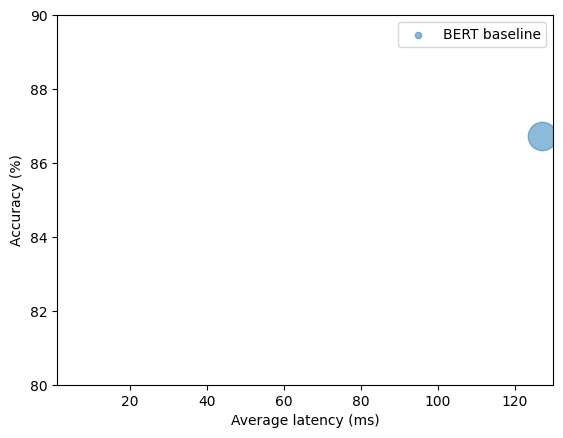

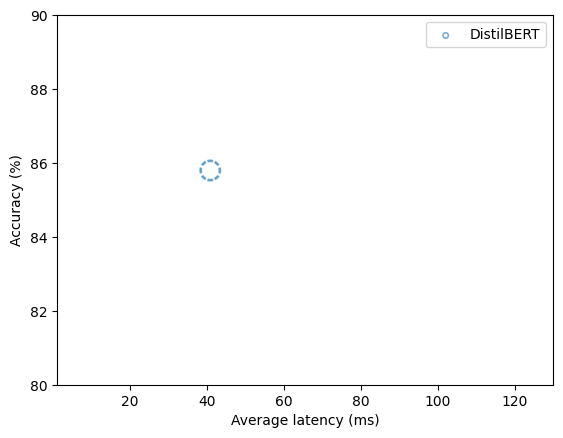

In [43]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_metrics(perf_metrics, current_optim_type):
  df = pd.DataFrame.from_dict(perf_metrics, orient="index")

  for idx in df.index:
    df_opt = df.loc[idx]
    # add a dashed circle around the optimization type
    if idx == current_optim_type:
      plt.scatter(df_opt["time_avg_ms"], df_opt["accuracy"] * 100,
                  alpha=0.5, s=df_opt["size_mb"], label=idx,
                  marker='$\u25CC$')
    else:
      plt.scatter(df_opt["time_avg_ms"], df_opt["accuracy"] * 100,
                  s=df_opt["size_mb"], label=idx, alpha=0.5)

    legend = plt.legend(bbox_to_anchor=(1,1))
    for handle in legend.legendHandles:
      handle.set_sizes([20])

    plt.ylim(80,90)
    #use the slowest model to define the x-axis range
    xlim=int(perf_metrics["BERT baseline"]["time_avg_ms"] + 3)
    plt.xlim(1, xlim)
    plt.ylabel("Accuracy (%)")
    plt.xlabel("Average latency (ms)")
    plt.show()

plot_metrics(perf_metrics, optim_type)

##Using Optuna


In [44]:
def objective(trail):
  x = trail.suggest_float("x", -2, 2)
  y = trail.suggest_float("y", -2, 2)
  return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

In [45]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.6 MB/s eta 0:00:00


In [46]:
import optuna

In [47]:
study = optuna.create_study()
study.optimize(objective, n_trials=1000)

[I 2024-01-28 10:13:30,611] A new study created in memory with name: no-name-04e129a1-c484-47f9-9ea2-87f7b226a768
[I 2024-01-28 10:13:30,616] Trial 0 finished with value: 230.56770625945046 and parameters: {'x': 0.011404576818755618, 'y': 1.515354091863781}. Best is trial 0 with value: 230.56770625945046.
[I 2024-01-28 10:13:30,621] Trial 1 finished with value: 631.9844993111323 and parameters: {'x': -1.7889160300650722, 'y': 0.7018081733485841}. Best is trial 0 with value: 230.56770625945046.
[I 2024-01-28 10:13:30,625] Trial 2 finished with value: 846.2831230234481 and parameters: {'x': 1.947104438982315, 'y': 0.8836632613430435}. Best is trial 0 with value: 230.56770625945046.
[I 2024-01-28 10:13:30,627] Trial 3 finished with value: 1208.5114262324535 and parameters: {'x': -1.3700786931006599, 'y': -1.5911608245076012}. Best is trial 0 with value: 230.56770625945046.
[I 2024-01-28 10:13:30,630] Trial 4 finished with value: 1424.0330390610395 and parameters: {'x': -1.6405573337200585

In [48]:
study.best_params

{'x': 1.0287164890255183, 'y': 1.0588994644972114}

In [49]:
def hp_space(trial):
  return {"num_train_epochs": trial.suggest_int("num_train_epochs", 5, 10),
          "alpha": trial.suggest_float("alpha", 0, 1),
          "temprature": trial.suggest_int("temperature", 2, 20)}

In [50]:
best_run = distilbert_trainer.hyperparameter_search(
    n_trials=2, direction="maximize", hp_space=hp_space)

[I 2024-01-28 10:14:01,603] A new study created in memory with name: no-name-bb1b1c6a-3380-431a-b590-c399899d9361
Trying to set temprature in the hyperparameter search but there is no corresponding field in `TrainingArguments`.
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some we

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.000000,0.006452
2,0.000000,0.000000,0.007419
3,0.000000,0.000000,0.007419
4,0.000000,0.000000,0.007419
5,0.000000,0.000000,0.009032
6,0.000000,0.000000,0.009032
7,0.000000,0.000000,0.009032
8,0.000000,0.000000,0.009032
9,0.000000,0.000000,0.009032


[I 2024-01-28 10:23:20,199] Trial 0 finished with value: 0.00903225806451613 and parameters: {'num_train_epochs': 9, 'alpha': 0.8377537387108798, 'temperature': 15}. Best is trial 0 with value: 0.00903225806451613.
Trying to set temprature in the hyperparameter search but there is no corresponding field in `TrainingArguments`.
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (in

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.000000,0.006452
2,0.000000,0.000000,0.007419
3,0.000000,0.000000,0.007419
4,0.000000,0.000000,0.007419
5,0.000000,0.000000,0.009032
6,0.000000,0.000000,0.009032
7,0.000000,0.000000,0.009032
8,0.000000,0.000000,0.009032
9,0.000000,0.000000,0.009032


[I 2024-01-28 10:32:42,118] Trial 1 finished with value: 0.00903225806451613 and parameters: {'num_train_epochs': 9, 'alpha': 0.29450088610457836, 'temperature': 17}. Best is trial 0 with value: 0.00903225806451613.


In [51]:
print(best_run)

BestRun(run_id='0', objective=0.00903225806451613, hyperparameters={'num_train_epochs': 9, 'alpha': 0.8377537387108798, 'temperature': 15}, run_summary=None)


In [52]:
for k,v in best_run.hyperparameters.items():
  setattr(student_training_args, k, v)

#define a new repository to store our distilled model
distilled_ckpt = "distilbert-base-uncased-distilled-clinc"
student_training_args.output_dir = distilled_ckpt

# Create a new trainer with optimal parameters
distil_trainer = DistillationTrainer(model_init=student_init,
                                     teacher_model=teacher_model, args=student_training_args,
                                     train_dataset=clinc_enc['train'], eval_dataset=clinc_enc['validation'],
                                     compute_metrics=compute_metrics, tokenizer=student_tokenizer)

distil_trainer.train();

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'classifier.we

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,2.661536,0.735161
2,3.105900,1.328054,0.857742
3,3.105900,0.675716,0.913226
4,1.142800,0.408755,0.933226
5,0.389800,0.297658,0.940323
6,0.389800,0.251708,0.943871
7,0.170100,0.230695,0.946452
8,0.097700,0.219307,0.948065
9,0.097700,0.218313,0.946774


##BenchMarking the model

In [53]:
distilled_ckpt = "transformersbook/distilbert-base-uncased-distilled-clinc"
pipe = pipeline("text-classification", model=distilled_ckpt)
optim_type = "Distillation"
pb = PerformanceBenchmark(pipe, clinc["test"], optim_type=optim_type)
perf_metrics.update(pb.run_benchmark())

config.json:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Model size (MB) -  255.88
Average latency(ms) -  39.49 +\-  2.40
Accuracy on test set -  0.868


<ipython-input-43-389ce8a77ba1>:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


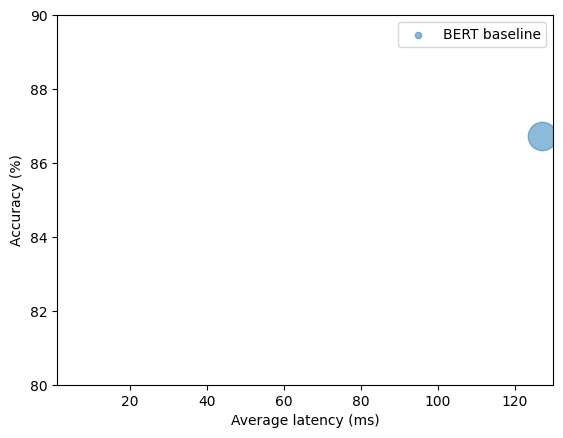

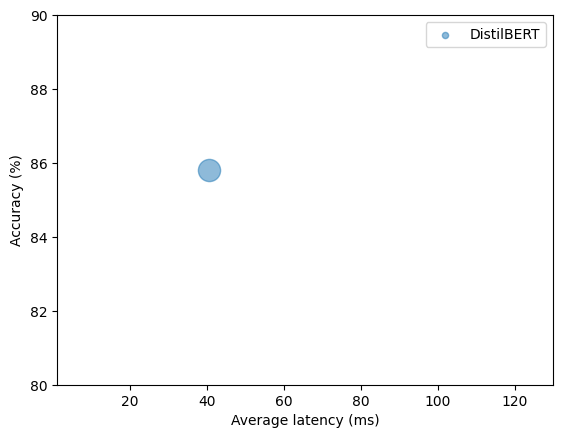

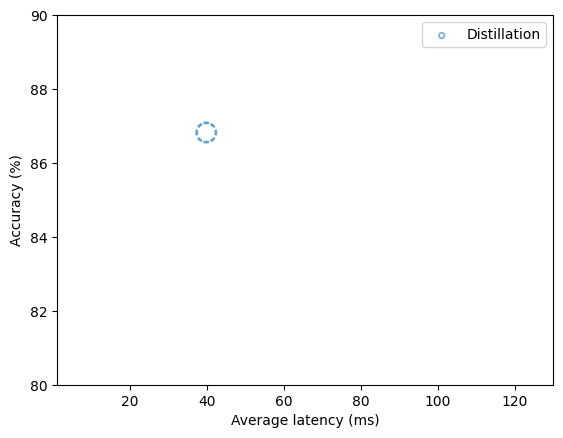

In [54]:
plot_metrics(perf_metrics, optim_type)

##Making it even more faster with Quantization

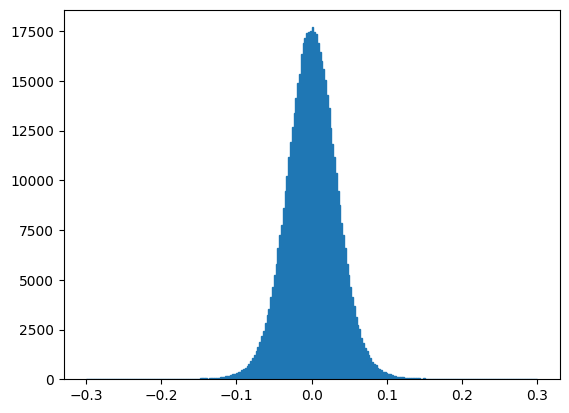

In [55]:
import matplotlib.pyplot as plt

state_dict = pipe.model.state_dict()
weights = state_dict["distilbert.transformer.layer.0.attention.out_lin.weight"]
plt.hist(weights.flatten().numpy(), bins=250, range=(-0.3, 0.3), edgecolor="C0")
plt.show()

In [56]:
zero_point = 0
scale = (weights.max() - weights.min()) / (127 - (-128))

In [57]:
(weights / scale + zero_point).clamp(-128, 127).round().char()

tensor([[ -5,  -8,   0,  ...,  -6,  -4,   8],
        [  8,   3,   1,  ...,  -4,   7,   0],
        [ -9,  -6,   5,  ...,   1,   5,  -3],
        ...,
        [  6,   0,  12,  ...,   0,   6,  -1],
        [  0,  -2, -12,  ...,  12,  -7, -13],
        [-13,  -1, -10,  ...,   8,   2,  -2]], dtype=torch.int8)

In [58]:
from torch import quantize_per_tensor

In [59]:
dtype = torch.qint8
quantized_weights = quantize_per_tensor(weights, scale, zero_point, dtype)
quantized_weights.int_repr()

tensor([[ -5,  -8,   0,  ...,  -6,  -4,   8],
        [  8,   3,   1,  ...,  -4,   7,   0],
        [ -9,  -6,   5,  ...,   1,   5,  -3],
        ...,
        [  6,   0,  12,  ...,   0,   6,  -1],
        [  0,  -2, -12,  ...,  12,  -7, -13],
        [-13,  -1, -10,  ...,   8,   2,  -2]], dtype=torch.int8)

In [60]:
%%timeit
weights @ weights

14.5 ms ± 2.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [61]:
from torch.nn.quantized import QFunctional

q_fn = QFunctional()

In [62]:
%%timeit
q_fn.mul(quantized_weights, quantized_weights)

233 µs ± 4.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [63]:
import sys

sys.getsizeof(weights.storage()) / sys.getsizeof(quantized_weights.storage())

<ipython-input-63-600687c2638a>:3: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  sys.getsizeof(weights.storage()) / sys.getsizeof(quantized_weights.storage())


3.999755879241598

In [64]:
from torch.quantization import quantize_dynamic

In [65]:
model_ckpt = "transformersbook/distilbert-base-uncased-distilled-clinc"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt).to("cpu"))

model_quantized = quantize_dynamic(model, {nn.Linear}, dtype=torch.qint8)

In [66]:
pipe = pipeline("text-classification", model=model_quantized, tokenizer=tokenizer)
optim_type = "Distillation + quantization"
pb = PerformanceBenchmark(pipe, clinc["test"], optim_type=optim_type)
perf_metrics.update(pb.run_benchmark())

Model size (MB) -  132.39
Average latency(ms) -  16.35 +\-  1.31
Accuracy on test set -  0.876


<ipython-input-43-389ce8a77ba1>:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


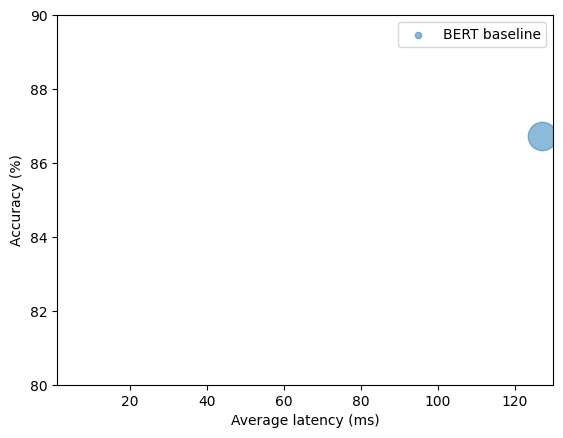

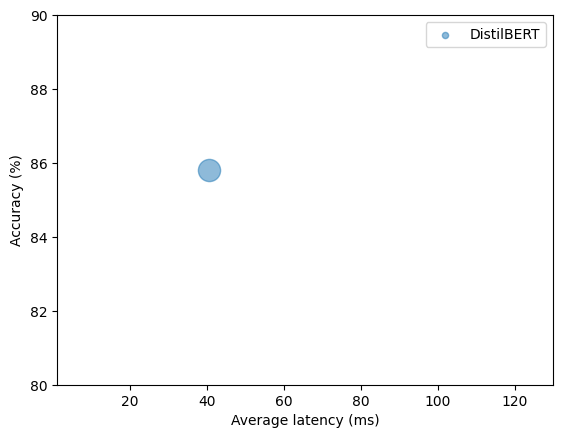

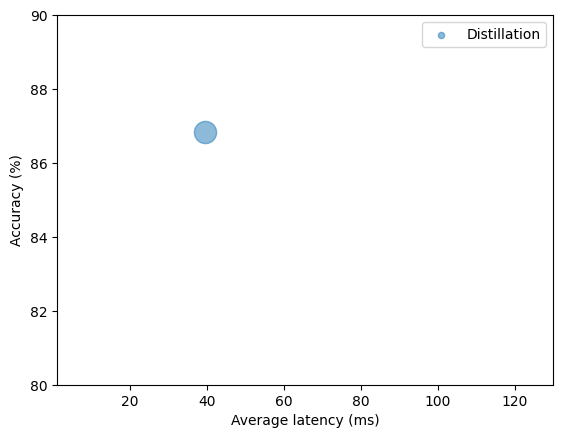

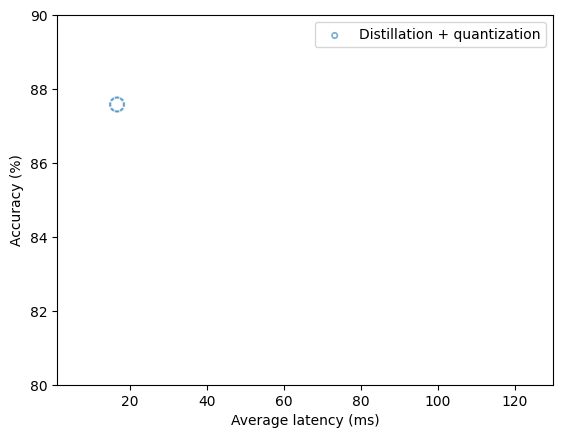

In [67]:
plot_metrics(perf_metrics, optim_type)

##Optimizing inference with ONNX runtime

In [68]:
import os
from psutil import cpu_count



In [69]:
os.environ["OMP_NUM_THREADS"] = f"{cpu_count()}"
os.environ["OMP_WAIT_POLICY"] = "ACTIVE"

In [70]:
from transformers.convert_graph_to_onnx import convert

In [71]:
!pip install onnx --upgrade
!pip install torch --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [72]:
model_ckpt = "transformersbook/distilbert-base-uncased-distilled-clinc"
onnx_model_path = Path("onnx/model.onnx")
convert(framework="pt", model=model_ckpt, tokenizer=tokenizer,
        output=onnx_model_path, opset=12, pipeline_name="text-classification")

/usr/local/lib/python3.10/dist-packages/transformers/convert_graph_to_onnx.py:379: FutureWarning: The `transformers.convert_graph_to_onnx` package is deprecated and will be removed in version 5 of Transformers
  warnings.warn(


ONNX opset version set to: 12
Loading pipeline (model: transformersbook/distilbert-base-uncased-distilled-clinc, tokenizer: DistilBertTokenizerFast(name_or_path='transformersbook/distilbert-base-uncased-distilled-clinc', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=

/usr/local/lib/python3.10/dist-packages/transformers/models/distilbert/modeling_distilbert.py:223: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  mask, torch.tensor(torch.finfo(scores.dtype).min)


In [74]:
pip install onnxruntime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.6 MB/s eta 0:00:00


In [76]:
from onnxruntime import (GraphOptimizationLevel, InferenceSession, SessionOptions)


def create_model_for_provider(model_path, provider="CPUExecutionProvider"):
  options = SessionOptions()
  options.intra_op_num_threads = 1
  options.graph_optimization_level = GraphOptimizationLevel.ORT_ENABLE_ALL
  session = InferenceSession(str(model_path), options, providers=[provider])
  session.disable_fallback()
  return session

onnx_model = create_model_for_provider(onnx_model_path)

In [77]:
inputs = clinc_enc["test"][:1]
del inputs["labels"]
logits_onnx = onnx_model.run(None, inputs)[0]
logits_onnx.shape

(1, 151)

In [78]:
np.argmax(logits_onnx)

61

In [79]:
clinc_enc["test"][0]["labels"]

61

In [80]:
from scipy.special import softmax

class OnnxPipeline:
  def __init__(self, model, tokenizer):
    self.model = model
    self.tokenizer = tokenizer

  def __call__(self, query):
    model_inputs = self.tokenizer(query, return_tensors="pt")
    inputs_onnx = {k: v.cpu().detach().numpy() for k, v in model_inputs.items()}
    logits = self.model.run(None, inputs_onnx)[0][0, :]
    probs = softmax(logits)
    pred_idx = np.argmax(probs).item()
    return [{"label": intents.int2str(pred_idx), "score": probs[pred_idx]}]

In [81]:
pipe= OnnxPipeline(onnx_model, tokenizer)
pipe(query)

[{'label': 'car_rental', 'score': 0.7848335}]

In [84]:
class OnnxPerformanceBenchmark(PerformanceBenchmark):
  def __init__(self, *args, model_path, **kwargs):
    super().__init__(*args, **kwargs)
    self.model_path = model_path

  def compute_size(self):
    size_mb = Path(self.model_path).stat().st_size / (1024 * 1024)
    print(f"Model size (MB) - {size_mb:.2f}")
    return {"size_mb": size_mb}

In [85]:
optim_type = "Distillation + ORT"
pb = OnnxPerformanceBenchmark(pipe, clinc["test"], optim_type, model_path="onnx/model.onnx")
perf_metrics.update(pb.run_benchmark())

Model size (MB) - 255.98
Average latency(ms) -  31.44 +\-  4.53
Accuracy on test set -  0.868


<ipython-input-43-389ce8a77ba1>:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


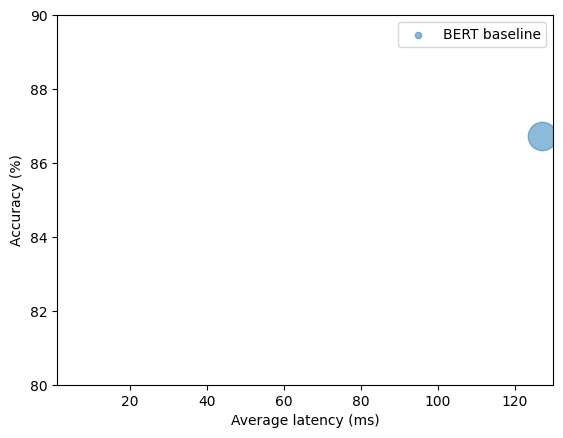

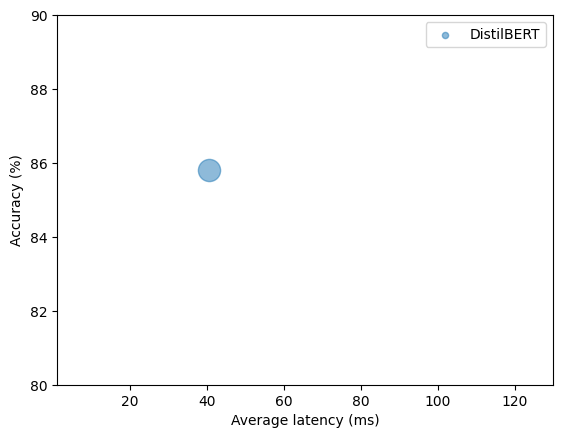

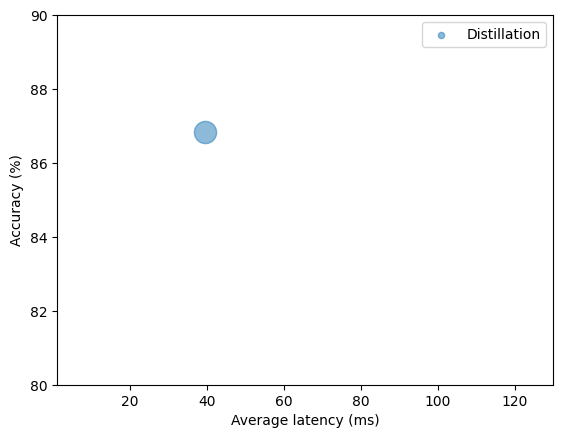

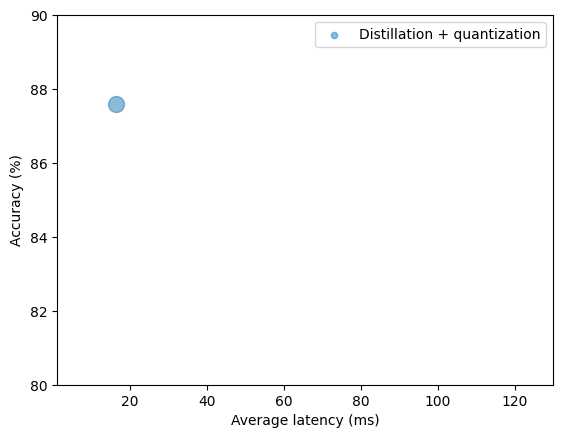

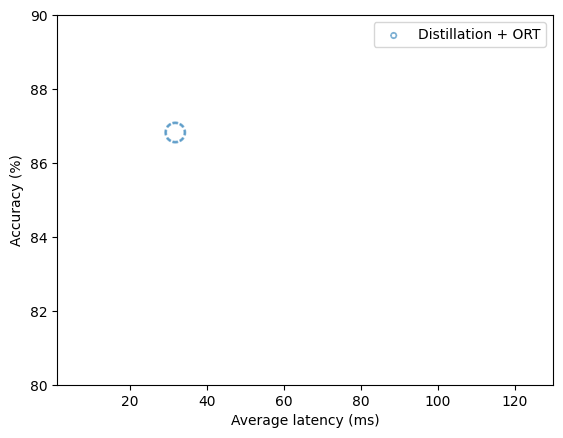

In [86]:
plot_metrics(perf_metrics, optim_type)

In [87]:
from onnxruntime.quantization import quantize_dynamic, QuantType

In [89]:
model_input = "onnx/model.onnx"
model_output = "onnx/model.quant.onnx"
quantize_dynamic(model_input, model_output, weight_type=QuantType.QInt8)

Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.0/attention/MatMul]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.0/attention/MatMul_1]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.1/attention/MatMul]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.1/attention/MatMul_1]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.2/attention/MatMul]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.2/attention/MatMul_1]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.3/attention/MatMul]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.3/attention/MatMul_1]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.4/attention/MatMul]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.4/attention/MatMul_1]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.5/attention/MatMul]
Ignore MatM

In [93]:
onnx_quantized_model = create_model_for_provider(model_output)
pipe = OnnxPipeline(onnx_quantized_model, tokenizer)
optim_type = "Distillation + ORT (quantized)"
pb = OnnxPerformanceBenchmark(pipe, clinc["test"], optim_type, model_path=model_output)
perf_metrics.update(pb.run_benchmark())

Model size (MB) - 64.36
Average latency(ms) -  28.39 +\-  9.39
Accuracy on test set -  0.876


<ipython-input-43-389ce8a77ba1>:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


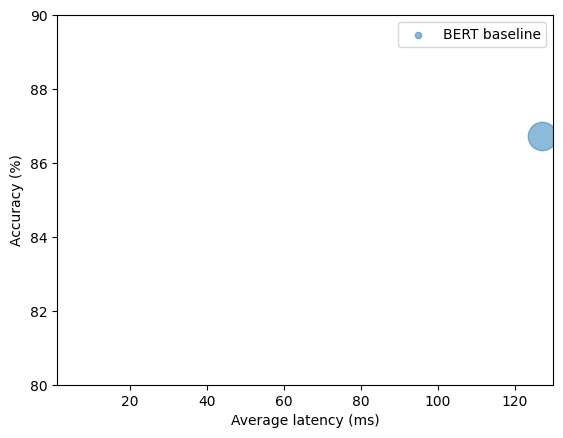

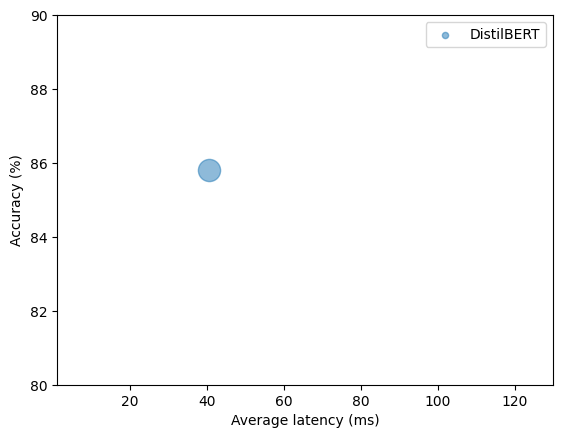

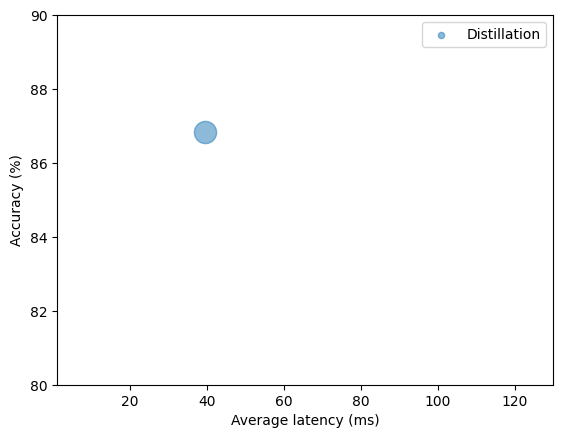

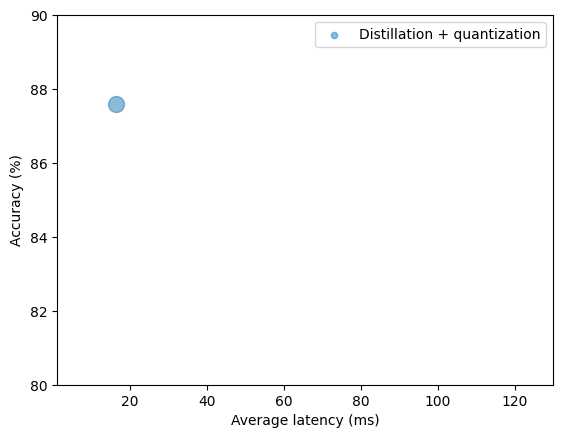

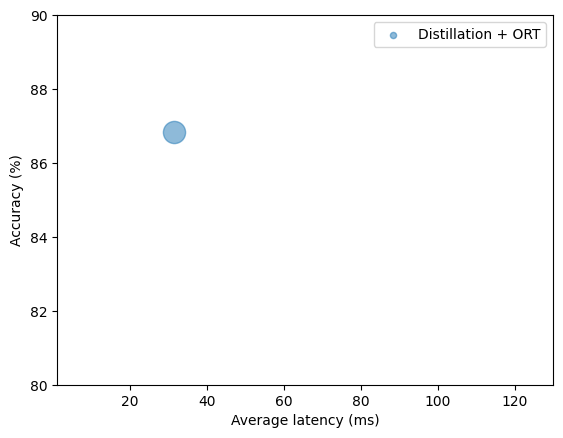

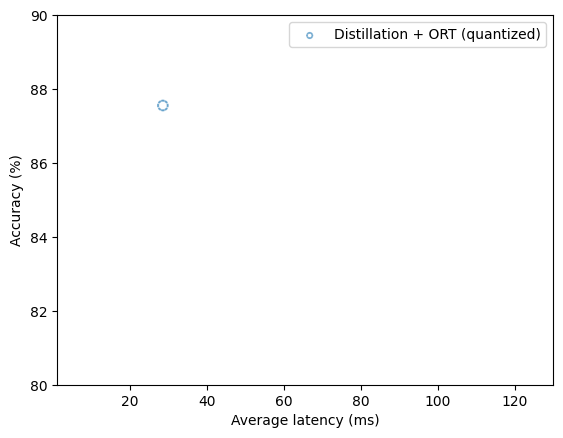

In [94]:
plot_metrics(perf_metrics, optim_type)

###can make the models sparser by weight pruning